In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [25]:
dataset = pd.read_csv("spam.csv",encoding='latin-1')
dataset.head() 

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [28]:
dataset = dataset.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
dataset = dataset.rename( columns={'v1':'label','v2':'Text'} )
dataset['label_enc'] = dataset['label'].map({'ham':0 , 'spam':1})
dataset.head()

,label,Text,label_enc
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


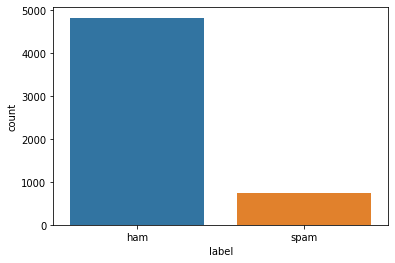

In [30]:
sns.countplot(x=dataset['label'])
plt.show()

In [31]:
# Find average number of tokens in all sentences
avg_words_len=round(sum([len(i.split()) for i in dataset['Text']])/len(dataset['Text']))
print(avg_words_len)

15


In [32]:
# Finding Total no of unique words in corpus
s = set()
for sent in dataset['Text']:
    for word in sent.split():
	    s.add(word)
          
total_words_length=len(s)
print(total_words_length)

15585


In [34]:
# Splitting data for Training and testing
from sklearn.model_selection import train_test_split

X, y = np.asanyarray(dataset['Text']), np.asanyarray(dataset['label_enc'])
new_df = pd.DataFrame({'Text': X, 'label': y})

X_train, X_test, y_train, y_test = train_test_split(
	new_df['Text'], new_df['label'], test_size=0.2, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape


((4457,), (4457,), (1115,), (1115,))

first we build a baseline model we then try to beat the performance of the model with deep learning 


In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report,accuracy_score

tfidf_vec = TfidfVectorizer().fit(X_train)
X_train_vec,X_test_vec = tfidf_vec.transform(X_train),tfidf_vec.transform(X_test)

baseline_model = MultinomialNB()
baseline_model.fit(X_train_vec,y_train)


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [36]:
nb_accuracy = accuracy_score(y_test, baseline_model.predict(X_test_vec))
print(nb_accuracy)
print(classification_report(y_test, baseline_model.predict(X_test_vec)))


0.9623318385650225
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.72      0.84       150

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115



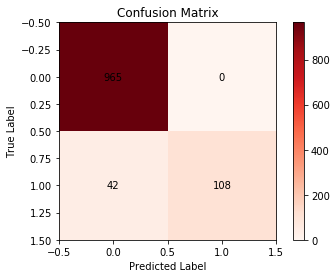

In [43]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Assuming baseline_model, X_test_vec, and y_test are already defined

# Get predictions
y_pred = baseline_model.predict(X_test_vec)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix with a different colormap
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Reds)  # Adjust the colormap here
plt.title('Confusion Matrix')
plt.colorbar()

# Adding axis labels
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Adding annotations with a different text color for better visibility
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')  # Adjust text color here

plt.show()
